# 2. Encoding and Baseline Model

## Project Goal
This notebook represents the next phase of our **end-to-end ML pipeline**. Having completed our Exploratory Data Analysis (EDA), our goal now is to prepare the data for modeling and establish a baseline performance using a simple **ML model**, specifically **Logistic Regression**. This will serve as a point of comparison for more complex models and help us understand the initial business **impact** of our predictions.

---

## 2.1 Data Preprocessing and Encoding

Before training any model, we must convert our cleaned, categorical data into a numerical format that an algorithm can understand. This process is called **encoding**. We will apply appropriate encoding strategies to all categorical features identified in the previous EDA notebook.

Our preprocessing steps will include:
-   **Separating features and the target variable.**
-   **Identifying categorical and numerical columns.**
-   **One-Hot Encoding** for nominal categorical features to avoid introducing a false sense of order.
-   **Label Encodoing** for binary features
-   **Splitting the dataset** into training and testing sets to evaluate our model's performance on unseen data.

---

## 2.2 Building a Baseline Logistic Regression Model

A **baseline model** is the simplest possible model that provides a first benchmark for a problem. It helps us confirm that a more complex model is actually providing value. **Logistic Regression** is an excellent choice for this as it's a simple, interpretable model commonly used for classification tasks like **churn prediction**.

We will cover the following steps:
-   **Training a Logistic Regression model** on our preprocessed training data.
-   **Evaluating the model's performance** on the test set using standard classification metrics such as accuracy, precision, recall, and the F1-score.
-   **Analyzing the coefficients** of the model to understand which features have the strongest influence on the prediction of **churn**. This will provide initial insights into key drivers of customer attrition.

The results from this notebook will inform our next steps and help us justify the need for more advanced modeling techniques like Random Forest or XGBoost to improve our **prediction** accuracy and business **KPIs**.

In [4]:
import pandas as pd



In [5]:
df = pd.read_csv("data/processed/telco_cleaned.csv", index_col= 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Encoding multiclass column using one hot encoding and label encoding binary columns 

In [6]:
binary_cols = [col for col in df.select_dtypes(include=['object']).columns
               if df[col].nunique() == 2]
multi_cols = [col for col in df.select_dtypes(include=['object']).columns
              if df[col].nunique() > 2]

print("Binary cols", binary_cols)
print("Multiclass cols", multi_cols)


Binary cols ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Multiclass cols ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


### Label Encoding and One hot encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for  col in binary_cols:
    df[col] = le.fit_transform(df[col])

df_encoded = pd.get_dummies(df, columns = multi_cols, drop_first = True, dtype=int)

df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [8]:
df_encoded.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

### Train Test Split of Dataset

In [9]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns= "Churn")
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

### Logistic Regression

ROC-AUC Score: 0.842607662300757

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



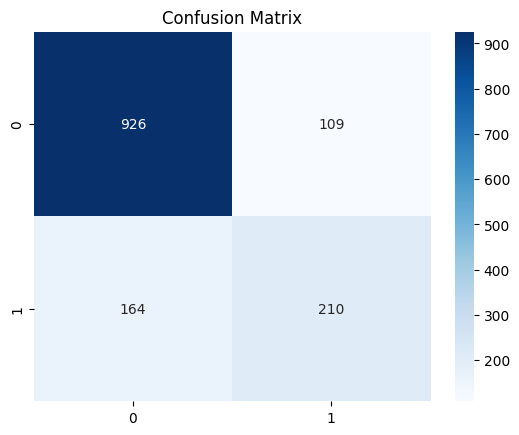

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 81%

ROC-AUC: 0.8426

Class 1 Recall: 56%

F1-Score (Class 1): 61%

Confusion matrix shows fewer false negatives and a slightly better balance between precision and recall for the positive class.